In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
data['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
data['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [ ]:
excluded =['CustomerID','tenure','MontlyCharges','TotalCharges']

for col in data.columns:
  if col not in excluded:
    print(f"\n Value Count for '{col}':\n")
    print(data[col].value_counts())
    print("--"*30)


 Value Count for 'customerID':

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
------------------------------------------------------------

 Value Count for 'gender':

gender
Male      3555
Female    3488
Name: count, dtype: int64
------------------------------------------------------------

 Value Count for 'SeniorCitizen':

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
------------------------------------------------------------

 Value Count for 'Partner':

Partner
No     3641
Yes    3402
Name: count, dtype: int64
------------------------------------------------------------

 Value Count for 'Dependents':

Dependents
No     4933
Yes    2110
Name: count, dtype: int64
------------------------------------------------------------

 Value Count for 'PhoneService':

PhoneService
Yes    6361
No   

<Axes: xlabel='Contract'>

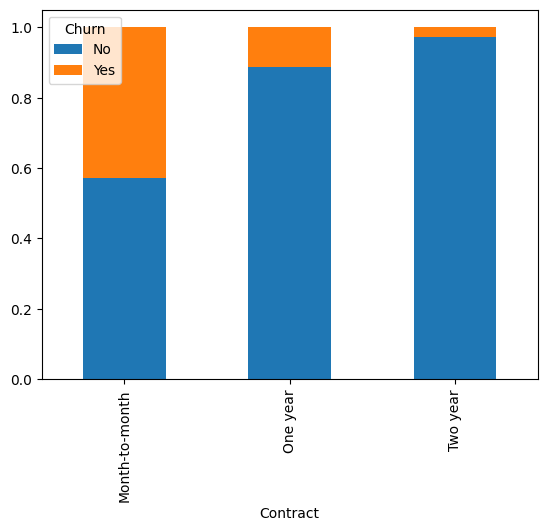

In [ ]:
data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='tenure_group'>

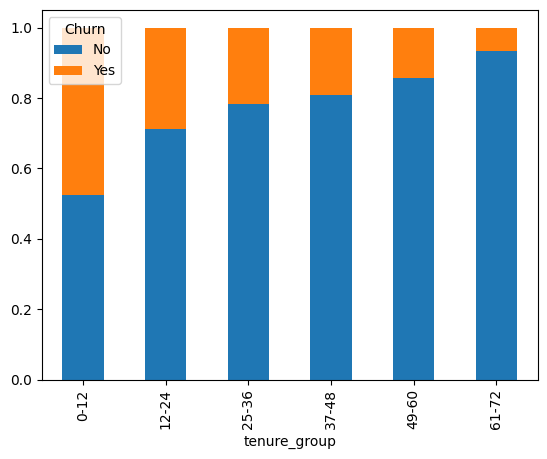

In [ ]:
data['tenure_group'] = pd.cut(data['tenure'],bins=[0,12,24,36,48,60,72],labels=['0-12','12-24','25-36','37-48','49-60','61-72'])


data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)

<Axes: xlabel='month_group'>

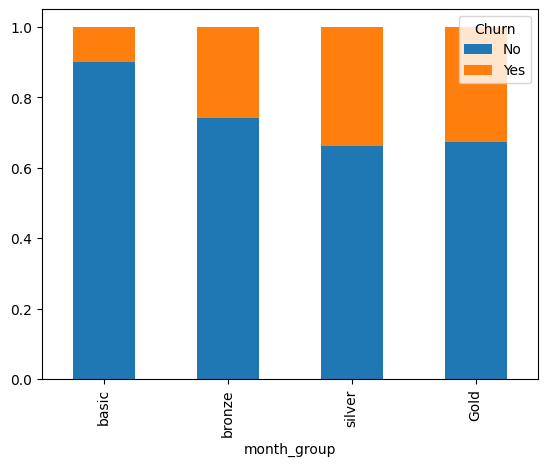

In [ ]:
data['month_group']=pd.cut(data['MonthlyCharges'],bins=[0,30,60,90,120],labels =["basic","bronze","silver","Gold"])

data.groupby('month_group')["Churn"].value_counts(normalize=True).unstack().plot(kind="bar",stacked=True)

In [ ]:
group = data.groupby(['StreamingTV','StreamingMovies','MultipleLines','Churn']).size().reset_index(name='count')


group['percent'] = group.groupby(['StreamingTV', 'StreamingMovies', 'MultipleLines'])['count'].transform(lambda x:x/ x.sum())

group.sort_values(by='percent',ascending=False).head(10)

,StreamingTV,StreamingMovies,MultipleLines,Churn,count,percent
14,No internet service,No internet service,Yes,No,332,0.970760
12,No internet service,No internet service,No,No,1081,0.913007
24,Yes,Yes,No phone service,No,157,0.785000
18,Yes,No,No phone service,No,64,0.752941
2,No,No,No phone service,No,222,0.742475
22,Yes,Yes,No,No,374,0.704331
8,No,Yes,No phone service,No,69,0.704082
20,Yes,No,Yes,No,259,0.703804
26,Yes,Yes,Yes,No,838,0.693135
6,No,Yes,No,No,216,0.692308


In [ ]:
Label_encode_cols= ['gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn' ]

In [ ]:
one_hot_encode_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod']

In [ ]:
from sklearn.preprocessing import LabelEncoder
data=data.copy()

le= LabelEncoder()
for col in Label_encode_cols:
  data[col]= le.fit_transform(data[col])



data =pd.get_dummies(data,columns=one_hot_encode_cols,drop_first=True)
# Convert only boolean columns to integers (0/1)
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


print(data.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges TotalCharges  ...  \
0             0                 1           29.85        29.85  ...   
1             1                 0           56.95       1889.5  ...   
2             1                 1           53.85       108.15  ...   
3             0                 0           42.30      1840.75  ...   
4             1                 1           70.70       151.65  ...   

   TechSupport_Yes StreamingTV_No internet service StreamingTV_Yes  \
0                0                               0               0   
1                0

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group', 'month_group',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,0


In [ ]:
data.drop(columns=['customerID','month_group','tenure_group'],inplace=True)

In [ ]:
# This will return all rows where TotalCharges is NOT numeric
non_numeric_rows = data[~data['TotalCharges'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]

# Display them
print(non_numeric_rows[['TotalCharges']])


     TotalCharges
488              
753              
936              
1082             
1340             
3331             
3826             
4380             
5218             
6670             
6754             


In [ ]:
# Convert to numeric, force errors to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is now NaN (optional: you could also fill with 0 or mean)
data.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after dropping
data.reset_index(drop=True, inplace=True)


In [ ]:
X= data.drop(columns=['Churn'])
y=data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False,eval_metric="logloss")

model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.69      1407
weighted avg       0.76      0.77      0.76      1407

0.7668798862828714
0.6868694058631989


In [ ]:
!pip install eli5
!pip install shap


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model,random_state=42)
perm.fit(X_test,y_test)

eli5.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.0229 ± 0.0136,tenure
0.0098 ± 0.0069,InternetService_Fiber optic
0.0088 ± 0.0072,Contract_Two year
0.0064 ± 0.0052,DeviceProtection_Yes
0.0060 ± 0.0043,MultipleLines_Yes
0.0050 ± 0.0099,Contract_One year
0.0045 ± 0.0060,OnlineSecurity_Yes
0.0030 ± 0.0029,PhoneService
0.0026 ± 0.0072,TechSupport_Yes
0.0026 ± 0.0060,PaperlessBilling


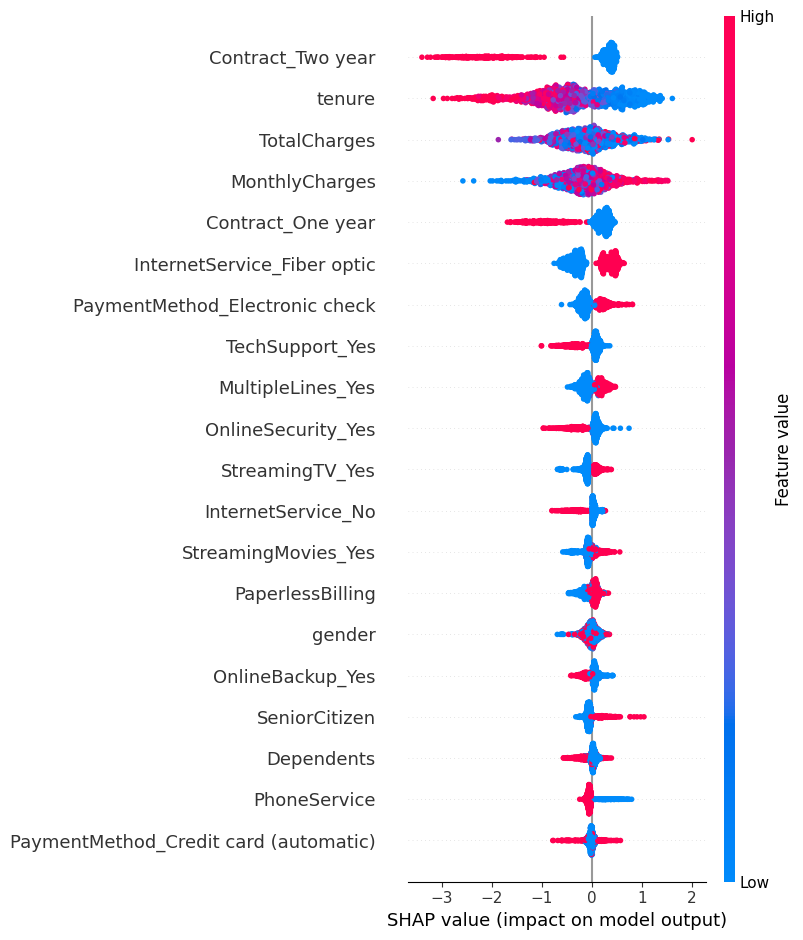

In [ ]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values,X_test)